# Week 4 | Joining data, SQL, RegEx


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql
import re

## Joining Data
Using the newly created `.csv` file: `cleaned_cell_phone_data.csv` from the previous homework which we have produced we can analyze the number of cell phones per capita using the given `.csv` file "`pop_data.csv`. First we have to clean up the data in said `.csv` file. 

In [6]:
cleaned_cell_phone_data_all_years = pd.read_csv("cleaned_cell_phone_data_all_years.csv")
cleaned_cell_phone_data_2015_onwards = pd.read_csv("cleaned_cell_phone_data.csv")

cell_phone_data = pd.read_csv("cell_phones_total.csv", sep=",")

country_data = pd.read_csv("country_data.csv", sep=",")

pop_data = pd.read_csv("pop_data.csv", sep=",")

In [7]:
pop_data = pop_data.dropna()
# Forward fill missing values
df_pop_ffill = pop_data.ffill()

# Backfill missing values
df_pop_bfill = pop_data.bfill()
pop_data

,Unnamed: 0,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
262,262,YEM,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,...,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0
263,263,ZAF,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,...,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0
264,264,ZMB,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,...,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0


In [ ]:
# Clean the population data by dropping unnecessary columns and melting it
pop_data_cleaned = pop_data.drop(columns=['Unnamed: 0'])  # Drop the 'Unnamed: 0' column
df_pop_melted = pd.melt(pop_data_cleaned, id_vars=['iso-3'], var_name='year', value_name='population')

# Clean the cell phone data: remove shorthand suffixes and convert to numeric
def clean_shorthand(value):
    if isinstance(value, str):
        value = value.replace('k', 'e3').replace('M', 'e6')  # Replace k with e3, M with e6
    return value

cell_phones_data_cleaned = cell_phone_data.copy() # Incase we might use this data later we make a copy
cell_phones_data_cleaned.iloc[:, 1:] = cell_phone_data.iloc[:, 1:].applymap(clean_shorthand)

# Melt the cleaned cell phone data
df_phones_melted = pd.melt(cell_phones_data_cleaned, id_vars=['iso-3'], var_name='year', value_name='n_cellphones')

# Merge the melted population and cell phone data
merged_data = pd.merge(df_phones_melted, df_pop_melted, on=['iso-3', 'year'], how='inner')

# Merge with the country data to include additional metadata
merged_data_all = pd.merge(merged_data, country_data, left_on='iso-3', right_on='alpha-3', how='inner')

# Drop redundant columns and clean up the result
merged_data_all.drop(columns=['alpha-3'], inplace=True)

merged_data_all[["iso-3", "year", "n_cellphones", "population"]].head(5)

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
1,ABW,1965,0.0,58782.0
2,ABW,1966,NaN,59291.0
3,ABW,1967,NaN,59522.0
4,ABW,1968,NaN,59471.0


Unnecessary columns were dropped to simplify the data, and `pd.melt` standardized it for easier analysis. Shorthand values in the cell phone data were converted to numeric for accurate calculations, with invalid values replaced by `None` to handle missing data consistently.

In [9]:
merged_data_all['phones_per_capita'] = merged_data_all['n_cellphones'] / merged_data_all['population']

phones_per_capita_df = merged_data_all.pivot(index='year', columns='name', values='phones_per_capita')

phones_per_capita_df

name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Virgin Islands (British),Virgin Islands (U.S.),Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


During merging, an inner join was used to exclude rows with missing values in shared columns, ensuring complete data alignment, ie. avoiding incomplete info. 

In [16]:
# Convert the index to integers
phones_per_capita_df.index = phones_per_capita_df.index.astype(int)

# Now the numeric indexing should work
phones_2019_numeric = phones_per_capita_df.loc[2019].dropna().apply(pd.to_numeric, errors='coerce')

# Identify the top 5 countries with the highest phones per capita in 2019
top_5_countries_2019 = phones_2019_numeric.nlargest(5).index

# Filter the DataFrame for the top 5 countries over the years 2015 to 2019
filtered_phones_per_capita_df = phones_per_capita_df.loc[2015:2019, top_5_countries_2019]

filtered_phones_per_capita_df





name,Hong Kong,United Arab Emirates,Seychelles,Montenegro,Thailand
year,,,,,
2015,2.290401,2.007424,1.58426,1.623379,1.465266
2016,2.398931,2.212521,1.605459,1.671212,1.699547
2017,2.488773,2.183431,1.742433,1.671024,1.720777
2018,2.670209,2.199084,1.8499,1.816057,1.7574
2019,2.86365,2.127739,1.987196,1.848791,1.823083


Finally we dealt with the missing values by dropping the rows with missing values before identifying the top countries so as to get a proper table. `nlargest` also provided an error if this was not done due to how it functions. All in all it ensures that only appropriate data is used to output this table.  

We will now visualize this more clearly using a plot. 

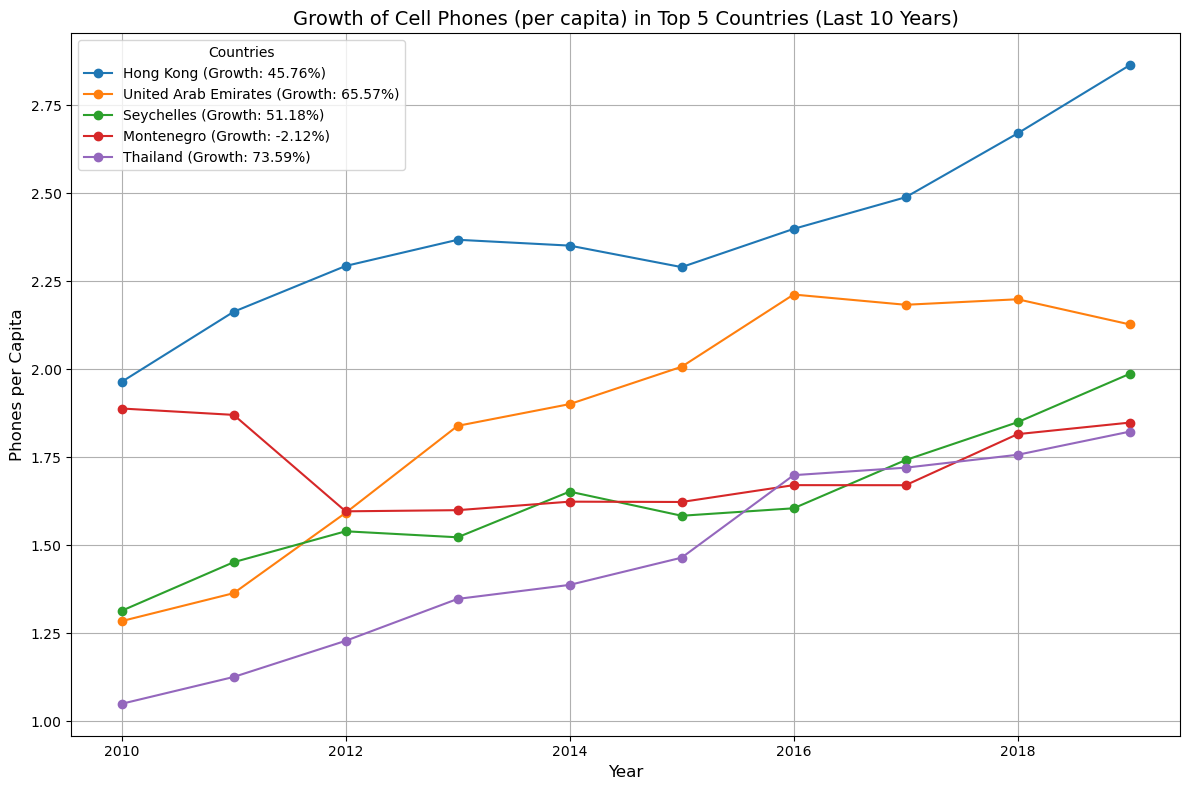

In [ ]:
import matplotlib.pyplot as plt

# Select the last 10 years of data for the top 5 countries
last_10_years = phones_per_capita_df.index[-10:]
filtered_phones_per_capita_10_years = phones_per_capita_df.loc[last_10_years, top_5_countries_2019]

# Calculate the growth rate (percent change) over the last 10 years
growth_rate_top_5_10_years = (
    (filtered_phones_per_capita_10_years.iloc[-1] - filtered_phones_per_capita_10_years.iloc[0]) 
    / filtered_phones_per_capita_10_years.iloc[0]
) * 100

# Plot the phones per capita trends for the last 10 years for the top 5 countries
plt.figure(figsize=(12, 8))

for country in filtered_phones_per_capita_10_years.columns:
    plt.plot(
        filtered_phones_per_capita_10_years.index, 
        filtered_phones_per_capita_10_years[country], 
        marker='o', 
        label=f"{country} (Growth: {growth_rate_top_5_10_years[country]:.2f}%)"
    )

# Add titles and labels
plt.title("Growth of Cell Phones (per capita) in Top 5 Countries (Last 10 Years)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Phones per Capita", fontsize=12)
plt.legend(title="Countries", fontsize=10)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


We can see that the country with the highest growth rate is Thailand with an increase of 73.59% from the last 10 years. While the country the highest numerical value has always been Hong Kong (atleast the 10 years we are observing). 

## SQL

In [ ]:
conn = sql.connect("user_actions.db")  # Ensure the correct path to the database file
cursor = conn.cursor()


In [ ]:
query = """
SELECT * 
FROM user_actions
WHERE action = "signup"
"""

cursor.execute(query)
pd.read_sql_query(query, conn)

,user_id,username,email,action,timestamp
0,34,user34,user34@email.com,signup,2015-02-04 14:38:47
1,28,user28,user28@email.com,signup,2015-03-09 11:55:33
2,1,user1,user1@email.com,signup,2015-11-06 08:07:13
3,24,user24,user24@email.com,signup,2015-12-11 15:25:07
4,15,user15,user15@email.com,signup,2016-04-03 16:12:11
5,20,user20,user20@email.com,signup,2016-05-28 16:40:00
6,18,user18,user18@email.com,signup,2016-06-01 08:27:40
7,25,user25,user25@email.com,signup,2016-06-16 15:50:18
8,3,user3,user3@email.com,signup,2016-06-28 13:28:53
9,9,user9,user9@email.com,signup,2016-09-09 12:14:19


In [ ]:
query = """
SELECT user_id, username, COUNT(*) as log_counts
FROM user_actions
GROUP BY user_id, username
ORDER BY log_counts DESC;
"""
cursor.execute(query)
pd.read_sql_query(query, conn)

,user_id,username,log_counts
0,13,user13,470
1,6,user6,457
2,4,user4,436
3,35,user35,394
4,31,user31,389
5,16,user16,379
6,17,user17,367
7,7,user7,362
8,20,user20,362
9,8,user8,329


In [ ]:
query = """
SELECT DISTINCT a.user_id, a.username        -- two instances
FROM user_actions a
JOIN user_actions b
ON a.user_id = b.user_id
   AND DATE(a.timestamp) = DATE(b.timestamp)
WHERE a.action = 'signup' AND b.action = 'login';
"""

cursor.execute(query)
pd.read_sql_query(query, conn)

,user_id,username
0,8,user8
1,12,user12
2,30,user30
3,7,user7
4,22,user22
5,5,user5
6,2,user2
7,32,user32


## RegEx

In [ ]:
with open("comments.txt", "r") as comments:
    content = comments.readlines() # open and read line by line

In [ ]:
first_comment = content[0]

pattern_hashtags = r'#\w+' # same as '\#\w+'

hashtags = re.findall(pattern_hashtags, first_comment)

print(hashtags)

['#programming', '#tips']


In [ ]:
# fetch 2nd comment
second_comment = content[1]

pattern_prog_python = r'(?=.*#programming)(?=.*#python)'

# find all cases of pattern above being present in the second comment
programming_python_hashtags = re.findall(pattern_prog_python, second_comment)

if pattern_prog_python not in second_comment:
    print("The hashtags 'programming' and 'python' are not in the second comment.")
else:
    print("The hashtags 'programming' and 'python' are in the second comment.")


The hashtags 'programming' and 'python' are not in the second comment.


In [ ]:
# join all comments into one large string so as to treat each comment as a single text block
all_comments = ' '.join(content)

# Find and deduplicate hashtags
hashtags = set(re.findall(pattern_hashtags, all_comments))

print(sorted(hashtags)) # sort alphabetically

['#analysis', '#analytics', '#coding', '#data', '#innovation', '#insights', '#programming', '#python', '#research', '#tech', '#tips']
